In [2]:
import os
print(os.getcwd())

/Users/jscoran


In [3]:
path="/Users/jscoran/Python_Projects"
os.chdir(path)
print(os.getcwd())

/Users/jscoran/Python_Projects


In [4]:
import pandas as pd
raw = pd.read_excel('nfl.xlsx')

In [5]:
raw.head()

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close,Notes
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,NaN,Y,Y,1.95,1.95,...,55.5,1.90,1.9,1.90,1.9,1.90,1.90,1.90,1.9,NaN
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,Y,Y,NaN,1.68,1.58,...,56.0,1.95,1.9,1.90,1.9,1.86,1.90,1.90,1.9,NaN
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,Y,Y,NaN,1.57,1.54,...,55.5,1.90,1.9,1.90,1.9,1.90,1.90,1.90,1.9,NaN
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,NaN,Y,NaN,1.26,1.23,...,52.0,1.90,1.9,1.90,1.9,1.90,1.90,1.90,1.9,NaN
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,NaN,Y,NaN,1.45,1.45,...,47.5,1.95,1.8,1.86,1.9,1.86,2.05,1.95,1.9,NaN


In [6]:
home_odds = ['Home Odds Open', 'Home Odds Min', 'Home Odds Max', 'Home Odds Close']
raw['Home_Odds'] = raw[home_odds].astype(float).mean(axis=1)

In [7]:
away_odds = ['Away Odds Open', 'Away Odds Min', 'Away Odds Max', 'Away Odds Close']
home_line = ['Home Line Open', 'Home Line Min', 'Home Line Max', 'Home Line Close']
away_line = ['Away Line Open', 'Away Line Min', 'Away Line Max', 'Away Line Close']
homeline_odds = ['Home Line Odds Open', 'Home Line Odds Min', 'Home Line Odds Max', 'Home Line Odds Close']
awayline_odds = ['Away Line Odds Open', 'Away Line Odds Min', 'Away Line Odds Max', 'Away Line Odds Close']
total_score = ['Total Score Open', 'Total Score Min', 'Total Score Max', 'Total Score Close']
total_over = ['Total Score Over Open', 'Total Score Over Min', 'Total Score Over Max', 'Total Score Over Close']
total_under = ['Total Score Under Open', 'Total Score Under Min', 'Total Score Under Max', 'Total Score Under Close']

# Create new columns using average of lines
raw['Away_Odds'] = raw[away_odds].astype(float).mean(axis=1)
raw['Home_Line'] = raw[home_line].astype(float).mean(axis=1)
raw['Away_Line'] = raw[away_line].astype(float).mean(axis=1)
raw['Homeline_Odds'] = raw[homeline_odds].astype(float).mean(axis=1)
raw['Awayline_Odds'] = raw[awayline_odds].astype(float).mean(axis=1)
raw['Total_Score'] = raw[total_score].astype(float).mean(axis=1)
raw['Total_Over'] = raw[total_over].astype(float).mean(axis=1)
raw['Total_Under'] = raw[total_under].astype(float).mean(axis=1)

In [8]:
raw.head(5)

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Notes,Home_Odds,Away_Odds,Home_Line,Away_Line,Homeline_Odds,Awayline_Odds,Total_Score,Total_Over,Total_Under
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,NaN,Y,Y,1.95,1.95,...,NaN,2.0500,1.7975,1.625,-1.625,1.8925,1.915,57.00,1.9000,1.90
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,Y,Y,NaN,1.68,1.58,...,NaN,1.6300,2.3750,-3.000,3.000,1.9150,1.915,56.25,1.9125,1.89
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,Y,Y,NaN,1.57,1.54,...,NaN,1.5875,2.5000,-3.125,3.125,1.8825,1.925,56.25,1.9000,1.90
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,NaN,Y,NaN,1.26,1.23,...,NaN,1.2525,4.0625,-8.125,8.125,1.9275,1.885,51.50,1.9000,1.90
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,NaN,Y,NaN,1.45,1.45,...,NaN,1.4750,2.7500,-4.250,4.250,1.9000,1.900,47.00,1.8775,1.94


In [9]:
raw['Overtime?'].fillna(0, inplace=True)
raw['Overtime?'] = raw['Overtime?'].replace('Y', 1)
raw['Playoff Game?'].fillna(0, inplace=True)
raw['Playoff Game?'] = raw['Playoff Game?'].replace('Y', 1)
raw['Neutral Venue?'].fillna(0, inplace=True)
raw['Neutral Venue?'] = raw['Neutral Venue?'].replace('Y', 1)
raw.head(5)

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home Odds Open,Home Odds Min,...,Notes,Home_Odds,Away_Odds,Home_Line,Away_Line,Homeline_Odds,Awayline_Odds,Total_Score,Total_Over,Total_Under
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,0,1,1,1.95,1.95,...,NaN,2.0500,1.7975,1.625,-1.625,1.8925,1.915,57.00,1.9000,1.90
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,1,1,0,1.68,1.58,...,NaN,1.6300,2.3750,-3.000,3.000,1.9150,1.915,56.25,1.9125,1.89
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,1,1,0,1.57,1.54,...,NaN,1.5875,2.5000,-3.125,3.125,1.8825,1.925,56.25,1.9000,1.90
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,0,1,0,1.26,1.23,...,NaN,1.2525,4.0625,-8.125,8.125,1.9275,1.885,51.50,1.9000,1.90
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,0,1,0,1.45,1.45,...,NaN,1.4750,2.7500,-4.250,4.250,1.9000,1.900,47.00,1.8775,1.94


In [10]:
# Create Dataframe for Analysis extracting relevant columns
extract = ['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Overtime?', 'Playoff Game?', 'Neutral Venue?', 'Home_Odds', 'Away_Odds', 'Home_Line', 'Away_Line', 'Homeline_Odds', 'Awayline_Odds', 'Total_Score', 'Total_Over', 'Total_Under']
bets = raw[extract].copy()
bets.head(5)

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home_Odds,Away_Odds,Home_Line,Away_Line,Homeline_Odds,Awayline_Odds,Total_Score,Total_Over,Total_Under
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,0,1,1,2.0500,1.7975,1.625,-1.625,1.8925,1.915,57.00,1.9000,1.90
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,1,1,0,1.6300,2.3750,-3.000,3.000,1.9150,1.915,56.25,1.9125,1.89
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,1,1,0,1.5875,2.5000,-3.125,3.125,1.8825,1.925,56.25,1.9000,1.90
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,0,1,0,1.2525,4.0625,-8.125,8.125,1.9275,1.885,51.50,1.9000,1.90
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,0,1,0,1.4750,2.7500,-4.250,4.250,1.9000,1.900,47.00,1.8775,1.94


In [11]:
import numpy as np

bets['Home_Odds_Prob'] = ((1/bets['Home_Odds'])*100)
bets['Away_Odds_Prob'] = ((1/bets['Away_Odds'])*100)
bets['Homeline_Odds_Prob'] = ((1/bets['Homeline_Odds'])*100)
bets['Awayline_Odds_Prob'] = ((1/bets['Awayline_Odds'])*100)
bets['Total_Over_Prob'] = ((1/bets['Total_Over'])*100)
bets['Total_Under_Prob'] = ((1/bets['Total_Under'])*100)

bets['Agg_Score'] = bets['Home Score'] + bets['Away Score']
bets['Spread'] = np.where(bets['Home Score'] - bets['Away Score'] >= 0 , bets['Home Score'] - bets['Away Score'], bets['Away Score'] - bets['Home Score'])
bets['Month'] = pd.DatetimeIndex(bets['Date']).month
bets['Year'] = pd.DatetimeIndex(bets['Date']).year

bets.head(5)



,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home_Odds,Away_Odds,...,Home_Odds_Prob,Away_Odds_Prob,Homeline_Odds_Prob,Awayline_Odds_Prob,Total_Over_Prob,Total_Under_Prob,Agg_Score,Spread,Month,Year
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,0,1,1,2.0500,1.7975,...,48.780488,55.632823,52.840159,52.219321,52.631579,52.631579,16,10,2,2019
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,1,1,0,1.6300,2.3750,...,61.349693,42.105263,52.219321,52.219321,52.287582,52.910053,68,6,1,2019
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,1,1,0,1.5875,2.5000,...,62.992126,40.000000,53.120850,51.948052,52.631579,52.631579,49,3,1,2019
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,0,1,0,1.2525,4.0625,...,79.840319,24.615385,51.880674,53.050398,52.631579,52.631579,34,6,1,2019
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,0,1,0,1.4750,2.7500,...,67.796610,36.363636,52.631579,52.631579,53.262317,51.546392,69,13,1,2019


In [12]:
months = {1 :'January', 2 :'February', 3 :'March', 4 :'April', 5 :'May', 6 :'June',  7 :'July', 8 :'August', 9 :'September', 10 :'October', 11 :'November', 12 :'December'}
df = bets.replace({'Month': months})
df

,Date,Home Team,Away Team,Home Score,Away Score,Overtime?,Playoff Game?,Neutral Venue?,Home_Odds,Away_Odds,...,Home_Odds_Prob,Away_Odds_Prob,Homeline_Odds_Prob,Awayline_Odds_Prob,Total_Over_Prob,Total_Under_Prob,Agg_Score,Spread,Month,Year
0,2019-02-03,Los Angeles Rams,New England Patriots,3,13,0,1,1,2.050000,1.797500,...,48.780488,55.632823,52.840159,52.219321,52.631579,52.631579,16,10,February,2019
1,2019-01-20,Kansas City Chiefs,New England Patriots,31,37,1,1,0,1.630000,2.375000,...,61.349693,42.105263,52.219321,52.219321,52.287582,52.910053,68,6,January,2019
2,2019-01-20,New Orleans Saints,Los Angeles Rams,23,26,1,1,0,1.587500,2.500000,...,62.992126,40.000000,53.120850,51.948052,52.631579,52.631579,49,3,January,2019
3,2019-01-13,New Orleans Saints,Philadelphia Eagles,20,14,0,1,0,1.252500,4.062500,...,79.840319,24.615385,51.880674,53.050398,52.631579,52.631579,34,6,January,2019
4,2019-01-13,New England Patriots,Los Angeles Chargers,41,28,0,1,0,1.475000,2.750000,...,67.796610,36.363636,52.631579,52.631579,53.262317,51.546392,69,13,January,2019
5,2019-01-12,Los Angeles Rams,Dallas Cowboys,30,22,0,1,0,1.300000,3.637500,...,76.923077,27.491409,53.333333,51.546392,52.631579,52.631579,52,8,January,2019
6,2019-01-12,Kansas City Chiefs,Indianapolis Colts,31,13,0,1,0,1.457500,2.850000,...,68.610635,35.087719,52.287582,52.910053,52.631579,52.631579,44,18,January,2019
7,2019-01-06,Chicago Bears,Philadelphia Eagles,15,16,0,1,0,1.372500,3.187500,...,72.859745,31.372549,50.000000,54.644809,51.282051,53.120850,31,1,January,2019
8,2019-01-06,Baltimore Ravens,Los Angeles Chargers,17,23,0,1,0,1.675000,2.275000,...,59.701493,43.956044,52.631579,52.083333,52.631579,52.910053,40,6,January,2019
9,2019-01-05,Dallas Cowboys,Seattle Seahawks,24,22,0,1,0,1.707500,2.212500,...,58.565154,45.197740,52.356021,52.356021,52.631579,52.631579,46,2,January,2019


In [13]:
# Spread Analysis for 2018-2019 Season
spread = df[:267].copy()
spread['Over/Under'] = np.where(spread['Agg_Score'] - spread['Total_Score'] > 0, 'Over', np.where(spread['Agg_Score'] - spread['Total_Score'] < 0, 'Under', 'Push'))
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(spread['Over/Under'])
plt.show()

<Figure size 640x480 with 1 Axes>

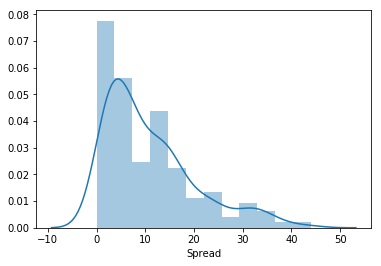

In [14]:
sns.distplot(spread['Spread'])
plt.show()

Text(0.5, 0, 'Combined Score')

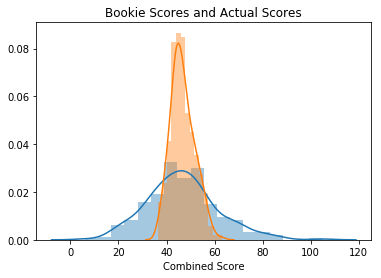

In [15]:
sns.distplot(spread['Agg_Score'])
sns.distplot(spread['Total_Score'])
plt.title("Bookie Scores and Actual Scores")
plt.xlabel("Combined Score")

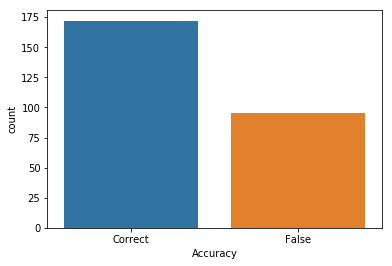

In [16]:
spread['Predicted_Winner'] = np.where(spread['Home_Odds_Prob'] > spread['Away_Odds_Prob'], 'Home', 'Away')
spread['Actual_Winner'] = np.where(spread['Home Score'] > spread['Away Score'], 'Home', np.where(spread['Away Score'] > spread['Home Score'], 'Away', 'Tie'))
spread['Accuracy'] = np.where(spread['Predicted_Winner'] == spread['Actual_Winner'], 'Correct', 'False')
sns.countplot(spread.Accuracy)

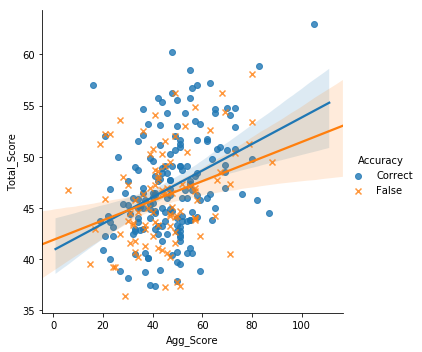

In [17]:
sns.lmplot(x='Agg_Score', y='Total_Score', data=spread, hue='Accuracy', markers=["o","x"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [total, Intercept, sigma]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:15<00:00, 916.23draws/s] 
The acceptance probability does not match the target. It is 0.8914019675354119, but should be close to 0.8. Try to increase the number of tuning steps.


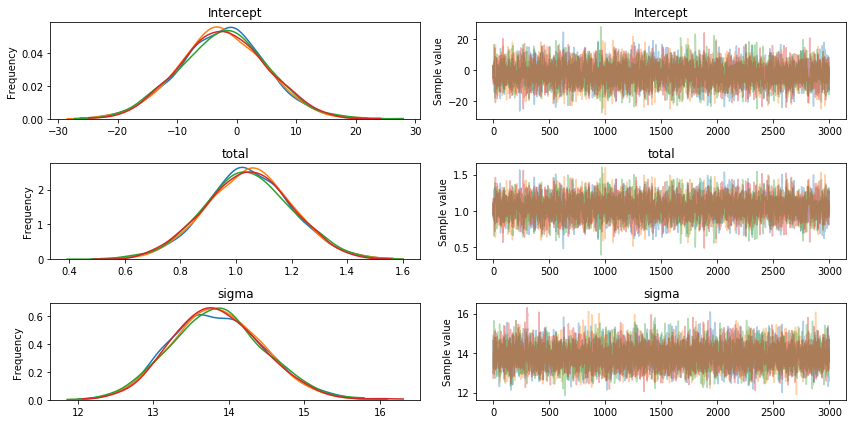

In [18]:
import pymc3 as pm

with pm.Model() as model: 
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=20)
    total_coeff = pm.Normal('total', 0, sd=20)
    
    # Define likelihood
    likelihood = pm.Normal('agg', mu=intercept + total_coeff * spread['Total_Score'],sd=sigma, observed=spread['Agg_Score'])
    trace = pm.sample(3000)

pm.traceplot(trace)
plt.show()

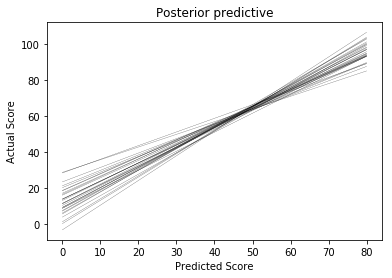

In [19]:
lm = lambda x, samples: 1 + samples['Intercept'] + samples['total']*x + samples['sigma'].mean()
pm.plot_posterior_predictive_glm(trace, lm=lm, eval=np.linspace(0, 80, 100))
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()

In [20]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,-2.320774,7.229147,0.109969,-16.114404,12.066686,4552.015016,1.000064
total,1.045653,0.153983,0.002355,0.734323,1.337007,4539.043580,1.000094
sigma,13.851896,0.601242,0.007955,12.724498,15.049220,5664.594672,0.999856


In [21]:
x = spread['Total_Score'][:-61]
x1 = spread['Total_Score'][-61:]
y = spread['Agg_Score'][:-61]
y1 = spread['Agg_Score'][-61:]
X_train = np.array(x)
X_train = X_train.reshape(-1,1)
y_train = np.array(y)
y_train = y_train.reshape(-1,1)
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)


0.11370695168777022

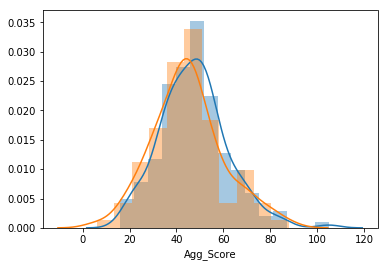

In [22]:
is_correct = spread['Accuracy'] == 'Correct'
is_false = spread['Accuracy'] == 'False'
false = spread[is_correct]
correct = spread[is_false]
sns.distplot(false['Agg_Score'])
sns.distplot(correct['Agg_Score'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [total, Intercept, sigma]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:14<00:00, 985.50draws/s] 
The acceptance probability does not match the target. It is 0.8903850499305531, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8936197758669372, but should be close to 0.8. Try to increase the number of tuning steps.


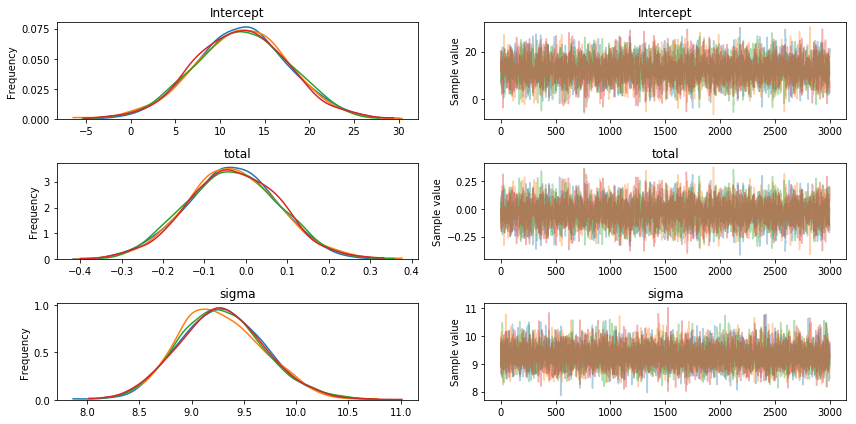

In [23]:
with pm.Model() as model: 
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('Intercept', 0, sd=20)
    total_coeff = pm.Normal('total', 0, sd=20)
    
    # Define likelihood
    likelihood = pm.Normal('Diff', mu=intercept + total_coeff * spread['Total_Score'],sd=sigma, observed=spread['Spread'])
    trace = pm.sample(3000)

pm.traceplot(trace)
plt.show()

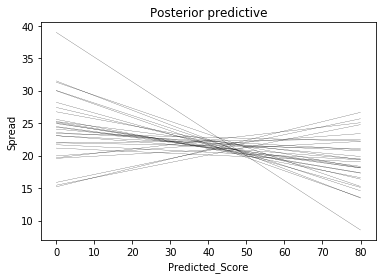

In [24]:
lm = lambda x, samples: 1 + samples['Intercept'] + samples['total']*x + samples['sigma'].mean()
pm.plot_posterior_predictive_glm(trace, lm=lm, eval=np.linspace(0, 80, 100))
plt.xlabel("Predicted_Score")
plt.ylabel("Spread")
plt.show()

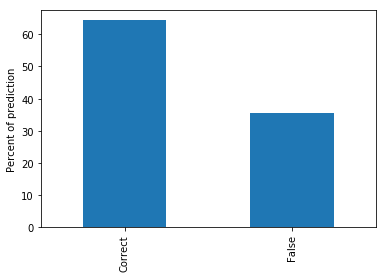

In [25]:
bankroll = 2500
prob_acc = spread.Accuracy.value_counts() / spread.Accuracy.shape[0]*100
prob_acc.plot(kind='bar')
plt.ylabel('Percent of prediction')
plt.show()
